In [ ]:
!pip install pytorch-lightning

In [ ]:
#!pip install torch==2.2.1

In [ ]:
#!python -m pip uninstall numpy

In [ ]:
#!pip install numpy==1.25.2

In [ ]:
import numpy as np
import torch
import pandas as pd
import pytorch_lightning as pl

In [ ]:
!wget -O 'valid_SMILES_and_cells.csv' #link removed
#here I used partially private data so I don't know if I can share
#public equivalent is at the https://depmap.org/ - file called "extended primary data matrix"
#I converted the ID's (like BRD:BRD-A00077618-236-07-6) to SMILES through pubchem but it's fairly simple, they have the dictionary among depmap files (extended primary compound list)

In [ ]:
PRISM_df = pd.read_csv('valid_SMILES_and_cells.csv', index_col=0)
#PRISM_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [ ]:
PRISM_df #here are the drug activities over cell lines (columns)

,Unnamed: 0,ACH-000001,ACH-000002,ACH-000004,ACH-000005,ACH-000006,ACH-000007,ACH-000008,ACH-000011,ACH-000012,...,ACH-002015,ACH-002016,ACH-002023,ACH-002025,ACH-002038,ACH-002039,ACH-002041,ACH-002042,ACH-002046,ACH-002048
0,C#CC1=C(C=CC2=CC(=CC(=C21)C3=NC=C4C(=C3F)N=C(N...,-1.207281,-4.231563,-3.860672,-2.271411,0.277833,-4.011285,-0.615105,-1.827661,-3.335969,...,-2.206238,-1.975287,-0.495741,-3.238121,1.223419,-2.314389,-2.805922,-2.332483,-3.441262,-1.254407
1,CCN1C2=C3C=C(NC3=NC=C2CN(C1=O)C4=C(C(=CC(=C4F)...,0.515743,NaN,NaN,NaN,NaN,0.196878,0.347821,-0.001031,-0.302195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CCCCCCCCCCNCCNC1(CC(OC(C1O)C)OC2C(C(C(OC2OC3=C...,-0.015577,NaN,NaN,NaN,NaN,-0.095730,0.379480,0.145346,0.103348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCOP(=O)(OCC)SCC[N+](C)(C)C.[I-],-0.395123,-0.538376,0.306971,0.035096,-0.124899,-0.861860,-0.137544,0.159798,-0.269911,...,-0.853007,-0.480284,0.012775,0.304118,-0.397145,0.202935,-0.335913,-0.334916,-0.343913,0.154135
4,CCC1CCCC(C(C(=O)C2=CC3C4CC(CC4C=CC3C2CC(=O)O1)...,-0.449332,NaN,NaN,NaN,NaN,0.257943,-0.596132,-0.499274,0.063870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,CNC(=C[N+](=O)[O-])NCCSCC1=CC=C(O1)CN(C)C.Cl,-0.148373,NaN,NaN,NaN,NaN,-0.590507,-1.351901,-0.653659,-0.256622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6708,CC1=C(C(=NC(=N1)N)N)C2=CC(=C(C=C2)Cl)Cl,-0.308255,NaN,NaN,NaN,NaN,0.439670,0.340361,0.239194,0.073621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6709,C1=CC=C(C=C1)CC2=C(C=CC(=C2)Cl)O,-0.067407,NaN,NaN,NaN,NaN,-0.275891,-0.323379,-0.534487,0.540634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6710,CC1CC(=O)NN=C1C2=CC=C(C=C2)NC(=O)C,0.448387,NaN,NaN,NaN,NaN,-0.191386,0.035115,-0.011005,-0.185457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#here I retrieve cell embeddings

In [ ]:
!wget -O UCE_emb.csv #link removed

In [ ]:
UCE_df = pd.read_csv('UCE_emb.csv', index_col=0)
UCE_emb = UCE_df.values
UCE_emb.shape

(1479, 1280)

In [ ]:
cell_IDs = UCE_df.index.tolist()

In [ ]:
PRISM_cell_IDs = PRISM_df.columns.tolist()[1:]

In [ ]:
cell_embs_dict = {}
for i in range(1479):
  if cell_IDs[i] in PRISM_cell_IDs:
    cell_embs_dict[cell_IDs[i]] = UCE_emb[i]

In [ ]:
!wget -O chem_embs.csv #link removed

In [ ]:
chem_embs = pd.read_csv('chem_embs.csv')
chem_embs_arr = chem_embs.to_numpy()
chem_embs_arr.shape

(6712, 512)

In [ ]:
chem_embs_dict = {}
for i in range(6712):
  chem_embs_dict[list(PRISM_df['Unnamed: 0'])[i]] = chem_embs_arr[i]

In [ ]:
# Initialize lists to store hybrid vectors and activity values
hybrid_vectors = []
activity_values = []

for index, row in PRISM_df.iterrows():
  drug = row[0]
  drug_embedding = chem_embs_dict[drug]
  #print(index)
  for cell_ID in list(PRISM_df.columns)[1:]:
    cell_value = row[cell_ID]
    if not np.isnan(cell_value):
      if cell_ID in cell_embs_dict.keys():
        cell_embedding = cell_embs_dict[cell_ID]
        # Construct hybrid vector by concatenating drug and cell embeddings
        #print(drug, cell_ID)
        hybrid_vector = np.concatenate([drug_embedding, cell_embedding])
        hybrid_vector = torch.tensor(hybrid_vector, dtype=torch.float32)
        hybrid_vectors.append(hybrid_vector)
        activity_values.append(cell_value)
hybrid_vectors = torch.stack(hybrid_vectors)
activity_values = np.array(activity_values)
activity_values = torch.tensor(activity_values, dtype=torch.float32)

In [ ]:
hybrid_vectors.shape

torch.Size([4064263, 1792])

In [ ]:
activity_values.shape

torch.Size([4064263])

In [ ]:
#these vectors are huge so it crashes RAM (peaks at 60 GB)

In [ ]:
!pip install tensorboard

In [ ]:
#here I struggle the most; I'm not sure what other regressor design to use
# currently simple MLP(2048,1042,512)

In [ ]:
import torch
import pytorch_lightning as pl
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from pytorch_lightning.loggers import TensorBoardLogger
import matplotlib.pyplot as plt


class ComplexMLPRegressor(pl.LightningModule):
    def __init__(self, input_dim=1792, output_dim=1):
        super(ComplexMLPRegressor, self).__init__()
        self.model = nn.Sequential(

            nn.Linear(input_dim, 2048),
            nn.LayerNorm(2048),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(2048, 1024),
            nn.LayerNorm(1024),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(1024, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.model(x)


    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = nn.MSELoss()(y_pred, y.squeeze())
        self.log('train_loss', loss, prog_bar=True)

        # Calculate RMSE for training set
        mse = mean_squared_error(y.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
        rmse = np.sqrt(mse)
        self.log('train_rmse', rmse, prog_bar=True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        val_loss = nn.MSELoss()(y_pred, y.squeeze())
        self.log('val_loss', val_loss, prog_bar=True)

        # Calculate RMSE for validation set
        mse = mean_squared_error(y.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
        rmse = np.sqrt(mse)
        self.log('val_rmse', rmse, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        test_loss = nn.MSELoss()(y_pred, y.squeeze())

        # Calculate RMSE for test set
        mse = mean_squared_error(y.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
        rmse = np.sqrt(mse)
        self.log('test_loss', test_loss, prog_bar=True)
        self.log('test_rmse', rmse, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0001)




# Split the data
X_trainandval, X_test, y_trainandval, y_test = train_test_split(hybrid_vectors, activity_values, test_size=0.1, shuffle = True, random_state=42)
#attempt to release RAM
hybrid_vectors = None
activity_values = None
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainandval, y_trainandval, test_size=0.1, shuffle = True, random_state=42)
X_trainandval = None
y_trainandval = None

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=1024, num_workers=15)
val_loader = DataLoader(val_dataset, batch_size=1024, num_workers=15)
test_loader = DataLoader(test_dataset, batch_size=1024, num_workers=15)

# Initialize model and trainer
logger = TensorBoardLogger("logs", name="my_model")
model = ComplexMLPRegressor()
trainer = pl.Trainer(max_epochs=30, logger=logger)

# Train the model
trainer.fit(model, train_loader, val_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 6.3 M 
-------------------------------------
6.3 M     Trainable params
0         Non-trainable params
6.3 M     Total params
25.211    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [ ]:
# Access RMSE values from the trainer after training
train_rmse_values = trainer.logged_metrics.get('train_rmse', None)
val_rmse_values = trainer.logged_metrics.get('val_rmse', None)

if train_rmse_values is not None:
    print("Train RMSE values:", train_rmse_values)
# Test the model and access test RMSE
trainer.test(model, test_loader)  # Use a list to pass the test_loader
test_rmse = trainer.callback_metrics['test_rmse']
print(f'Test RMSE: {test_rmse:.4f}')

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.4289638102054596     │
│         test_rmse         │    0.6534194946289062     │
└───────────────────────────┴───────────────────────────┘

Test RMSE: 0.6534


In [ ]:
# Put the model in evaluation mode
model.eval()

# Get predictions from the model
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions and actual values to NumPy arrays
predictions_np = predictions.detach().cpu().numpy()
actual_values_np = y_test.cpu().numpy()

# Calculate Pearson correlation coefficient
pearson_corr = np.corrcoef(predictions_np.flatten(), actual_values_np.flatten())[0, 1]

print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.8271648399735309


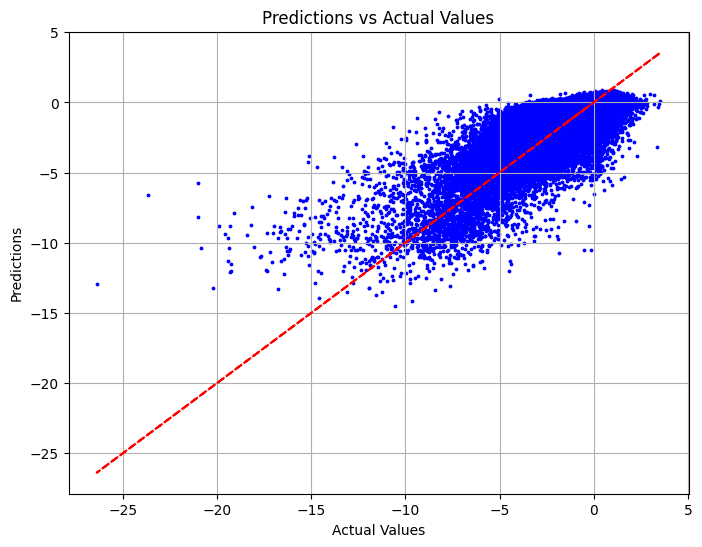

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions_np' and 'actual_values_np' are NumPy arrays containing predictions and actual values

# Plotting the predictions against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values_np, predictions_np, color='blue', s=3)
plt.plot(actual_values_np, actual_values_np, color='red', linestyle='--')  # Plotting the y=x line
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()
